# Proyek Analisis Data: Nama dataset
- Nama: Rendy Adiyana Budiman 
- Email:rendyadiyanabudiman3@gmail.com
- Id Dicoding:rendyadiyana21

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend peminjaman sepeda dalam 2 tahun kebelakang?
2. Apakah ada jam tertentu dimana peminjama sepeda naik?
3. Apa musim yang memiliki peminjam sepeda terbanyak?
4. Apakah ada korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda?
5. Apakah cuaca mempengaruhi peminjaman sepeda?

## Menyiapkan semua library yang dibuthkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [5]:
#Ubah file path pada coding berikut sesuai dengan path dimana anda menyimpan database dari bike sharing
daily_data = pd.read_csv("https://raw.githubusercontent.com/RendyAdiyana/Bike-Sharing/main/Bike-sharing-dataset/day.csv")
hourly_data = pd.read_csv("https://raw.githubusercontent.com/RendyAdiyana/Bike-Sharing/main/Bike-sharing-dataset/hour.csv")

In [6]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Assessing Data

In [8]:
duplicate_hourly = hourly_data.duplicated().sum()
duplicate_daily = daily_data.duplicated().sum()

In [9]:
missing_hourly = hourly_data.isnull().sum()
missing_daily = daily_data.isnull().sum()

In [10]:
data_types_hourly = hourly_data.dtypes
data_types_daily = daily_data.dtypes

Data duplikat:

In [11]:
print("Data Duplikat pada Hourly Dataset:", duplicate_hourly)
print("Data Duplikat pada Daily Dataset:", duplicate_daily)

Data Duplikat pada Hourly Dataset: 0
Data Duplikat pada Daily Dataset: 0


Tipe data tiap kolom:

In [12]:
print("Tipe Data Tiap Kolom di Hourly Dataset:")
print(data_types_hourly)
print("Tipe Data Tiap Kolom di Daily Dataset:")
print(data_types_daily)

Tipe Data Tiap Kolom di Hourly Dataset:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
Tipe Data Tiap Kolom di Daily Dataset:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Missing value pada kolom:

In [13]:
print("\nMissing Values di Hourly Dataset:")
print(missing_hourly)
print("\nMissing Values di Daily Dataset:")
print(missing_daily)


Missing Values di Hourly Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values di Daily Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Analisis deskriptif day.csv:

In [14]:
daily_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Analisis deskriptif hour.csv:

In [15]:
hourly_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil analisis deskriptif terlihat terdapat outlier pada data yang perlu dicek ketika cleaning data apakah outlier tersebut akan mempengaruhi keseluruhan data atau tidak

Mencari tahu unique value pada data:

In [16]:
daily_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [17]:
hourly_data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [18]:
day_per_hour = hourly_data.groupby(by="dteday").agg({'hr':'count'}).reset_index()
day_per_hour[day_per_hour['hr']<24].sort_values('hr')

,dteday,hr
667,2012-10-29,1
26,2011-01-27,8
668,2012-10-30,11
17,2011-01-18,12
25,2011-01-26,16
...,...,...
723,2012-12-24,23
69,2011-03-11,23
71,2011-03-13,23
34,2011-02-04,23


In [19]:
hourly_data['hr'].value_counts().sort_index()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

In [20]:
hr_zero_cnt = hourly_data[(hourly_data['hr'].notnull()) & (hourly_data['cnt'] == 0)]

print(hr_zero_cnt)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Jika dilihat dari data tersebut dapat diasumsikan bahwa missing value pada kolom hr dikarenakan tidak ada yang meminjam sepeda sehingga tidak dimasukan kedalam dataframe. 

In [21]:
hourly_grouped = hourly_data.groupby('dteday')['cnt'].sum().reset_index()

comparison = pd.merge(hourly_grouped, daily_data[['dteday', 'cnt']], on='dteday', suffixes=('_hourly', '_daily'))

comparison['equal_counts'] = comparison['cnt_hourly'] == comparison['cnt_daily']

print(comparison)

         dteday  cnt_hourly  cnt_daily  equal_counts
0    2011-01-01         985        985          True
1    2011-01-02         801        801          True
2    2011-01-03        1349       1349          True
3    2011-01-04        1562       1562          True
4    2011-01-05        1600       1600          True
..          ...         ...        ...           ...
726  2012-12-27        2114       2114          True
727  2012-12-28        3095       3095          True
728  2012-12-29        1341       1341          True
729  2012-12-30        1796       1796          True
730  2012-12-31        2729       2729          True

[731 rows x 4 columns]


In [22]:
unequal_counts = comparison[comparison['equal_counts'] == False]
print(unequal_counts)


Empty DataFrame
Columns: [dteday, cnt_hourly, cnt_daily, equal_counts]
Index: []


Hasil perhitungan jumlah pengguna dari kedua sumber sama tidak ditemukan inconsistent value ataupun missing value untuk kolom cnt

In [23]:
hourly_data.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [24]:
daily_data.weathersit.value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [25]:
weather4 = hourly_data[hourly_data['weathersit'] == 4]
print(weather4)

      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
585       586  2011-01-26       1   0     1  16        0        3           1   
8854     8855  2012-01-09       1   1     1  18        0        1           1   
9123     9124  2012-01-21       1   1     1   1        0        6           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
585            4  0.22  0.1970  0.93     0.3284       1          35   36  
8854           4  0.20  0.2273  0.86     0.0896       6         158  164  
9123           4  0.14  0.1364  0.86     0.1940       1          22   23  


In [26]:
pd.concat([
    daily_data[daily_data['dteday'] == '2011-01-26'],
    daily_data[daily_data['dteday'] == '2012-01-09'],
    daily_data[daily_data['dteday'] == '2012-01-21']
])

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
373,374,2012-01-09,1,1,1,0,1,1,2,0.224167,0.247479,0.701667,0.098900,106,2270,2376
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301


In [27]:
temp_hour=hourly_data.groupby('dteday')['temp'].mean()
print(temp_hour)

dteday
2011-01-01    0.344167
2011-01-02    0.363478
2011-01-03    0.196364
2011-01-04    0.200000
2011-01-05    0.226957
                ...   
2012-12-27    0.254167
2012-12-28    0.253333
2012-12-29    0.253333
2012-12-30    0.255833
2012-12-31    0.215833
Name: temp, Length: 731, dtype: float64


In [28]:
hum_hour=hourly_data.groupby('dteday')['hum'].mean()
print(hum_hour)

dteday
2011-01-01    0.805833
2011-01-02    0.696087
2011-01-03    0.437273
2011-01-04    0.590435
2011-01-05    0.436957
                ...   
2012-12-27    0.652917
2012-12-28    0.590000
2012-12-29    0.752917
2012-12-30    0.483333
2012-12-31    0.577500
Name: hum, Length: 731, dtype: float64


In [29]:
atemp_hour=hourly_data.groupby('dteday')['atemp'].mean()
print(atemp_hour)

dteday
2011-01-01    0.363625
2011-01-02    0.353739
2011-01-03    0.189405
2011-01-04    0.212122
2011-01-05    0.229270
                ...   
2012-12-27    0.226642
2012-12-28    0.255046
2012-12-29    0.242400
2012-12-30    0.231700
2012-12-31    0.223487
Name: atemp, Length: 731, dtype: float64


In [30]:
wind_hour=hourly_data.groupby('dteday')['windspeed'].mean()
print(wind_hour)

dteday
2011-01-01    0.160446
2011-01-02    0.248539
2011-01-03    0.248309
2011-01-04    0.160296
2011-01-05    0.186900
                ...   
2012-12-27    0.350133
2012-12-28    0.155471
2012-12-29    0.124383
2012-12-30    0.350754
2012-12-31    0.154846
Name: windspeed, Length: 731, dtype: float64


Dari hasil Assesing Data diketahui bahwa terdapat kendala berupa kesalahan tipe data untuk kolom dteday dimana kolom tersebut memiliki tipe data object (Digunakan untuk tipe data String) yang seharusnya memiliki tipe data datetime. Kemudian akan ada beberapa kolom yang diubah namanya agar mempermudah ketika melakukan Exploitary Data Analysis

Tidak ditemukan missing value ataupun data duplikat dari kedua file csv day. Ketika menggunakan fungsi isna, namun ketika dilakukan groupby berdasarkan tanggal diketahui terdapat missing value di beberapa jam tertentu, perlu dilakukan visualisasi pada saat cleaning data untuk menilai lebih lanjut apa yang perlu dilakukan terhdap missing value tersebut. Apakah akan dilakukan dropping atau melakukan imputasi. 

Pada tahap cleaning data akan ada beberapa kolom yang di drop diantaranya: atemp, dan instant karena kedua kolom tersebut dinilai tidak perlu dianalisa lebih lanjut sehingga dapat dilakukan dropping. Kemudian akan menampilkan kembali hasil sebelum di normalisasi pada beberapa kolom.

Setalah hasil Assesing Data lebih baik menggunakan file hour yang lebih detail untuk analisa lebih lanjut. 

### Cleaning Data

Mengubah nama kolom

In [31]:
daily_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','weathersit':'weather', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
hourly_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','hr': 'hour', 'hum': 'humidity','weathersit':'weather', 'cnt': 'count'}, inplace=True)

Mengubah Tipe Data:

In [32]:
# Mengubah tipe data ke datetime
hourly_data['date'] = pd.to_datetime(hourly_data['date'])
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Mengubaha tipe data ke categorical
daily_data['season'] = daily_data.season.astype('category')
daily_data['year'] = daily_data.year.astype('category')
daily_data['month'] = daily_data.month.astype('category')
daily_data['holiday'] = daily_data.holiday.astype('category')
daily_data['weekday'] = daily_data.weekday.astype('category')
daily_data['workingday'] = daily_data.workingday.astype('category')
daily_data['weather'] = daily_data.weather.astype('category')

hourly_data['season'] = hourly_data.season.astype('category')
hourly_data['year'] = hourly_data.year.astype('category')
hourly_data['month'] = hourly_data.month.astype('category')
hourly_data['holiday'] = hourly_data.holiday.astype('category')
hourly_data['weekday'] = hourly_data.weekday.astype('category')
hourly_data['workingday'] = hourly_data.workingday.astype('category')
hourly_data['weather'] = hourly_data.weather.astype('category')


In [33]:
daily_data['weekday'] = daily_data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hourly_data['weekday'] = hourly_data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

daily_data['month'] = daily_data['month'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
})

hourly_data['month'] = hourly_data['month'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
})

daily_data['year'] = daily_data['year'].map({
    0: 2011, 1: 2012
})
hourly_data['year'] = hourly_data['year'].map({
    0: 2011, 1: 2012
})

daily_data['season'] = daily_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hourly_data['season'] = hourly_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

daily_data['weather'] = daily_data['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hourly_data['weather'] = hourly_data['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [34]:
daily_data.head(3)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [35]:
hourly_data.head(3)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32


Mengembalikan nilai sebelum normalisasi:

In [36]:
daily_data['temp'] = daily_data['temp']*41
daily_data['atemp'] = daily_data['atemp']*50
daily_data['humidity'] = daily_data['humidity']*100
daily_data['windspeed'] = daily_data['windspeed']*67

hourly_data['temp'] = hourly_data['temp']*41
hourly_data['atemp'] = hourly_data['atemp']*50
hourly_data['humidity'] = hourly_data['humidity']*100
hourly_data['windspeed'] = hourly_data['windspeed']*67

In [37]:
daily_data.head(3)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Sat,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sun,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [38]:
hourly_data.head(3)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Sat,0,Clear/Partly Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sat,0,Clear/Partly Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sat,0,Clear/Partly Cloudy,9.02,13.635,80.0,0.0,5,27,32


Melakukan drop pada kolom yang tidak berpengaruh

In [39]:
daily_data.drop('instant', axis=1, inplace=True)
hourly_data.drop('instant', axis=1, inplace=True)

In [40]:
daily_data.to_csv("cleaned_bikeshare_day.csv", index=False)
hourly_data.to_csv("cleaned_bikeshare_hour.csv", index=False)

Cek Outlier pada file hour.csv dan day.csv

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\782405168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(daily_data['count'])


<Axes: xlabel='count', ylabel='Density'>

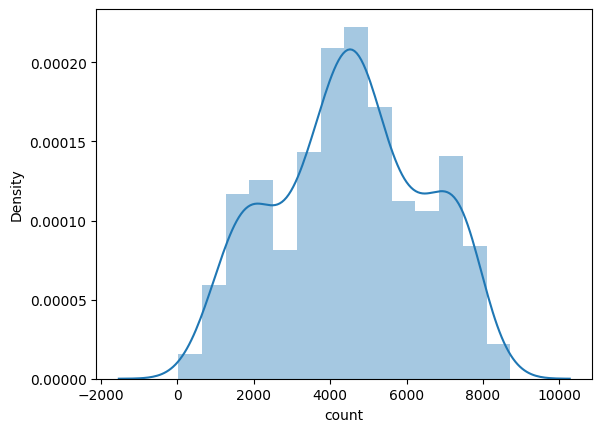

In [41]:
sn.distplot(daily_data['count'])

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot Peminjaman Berdasarkan Temperatur')]

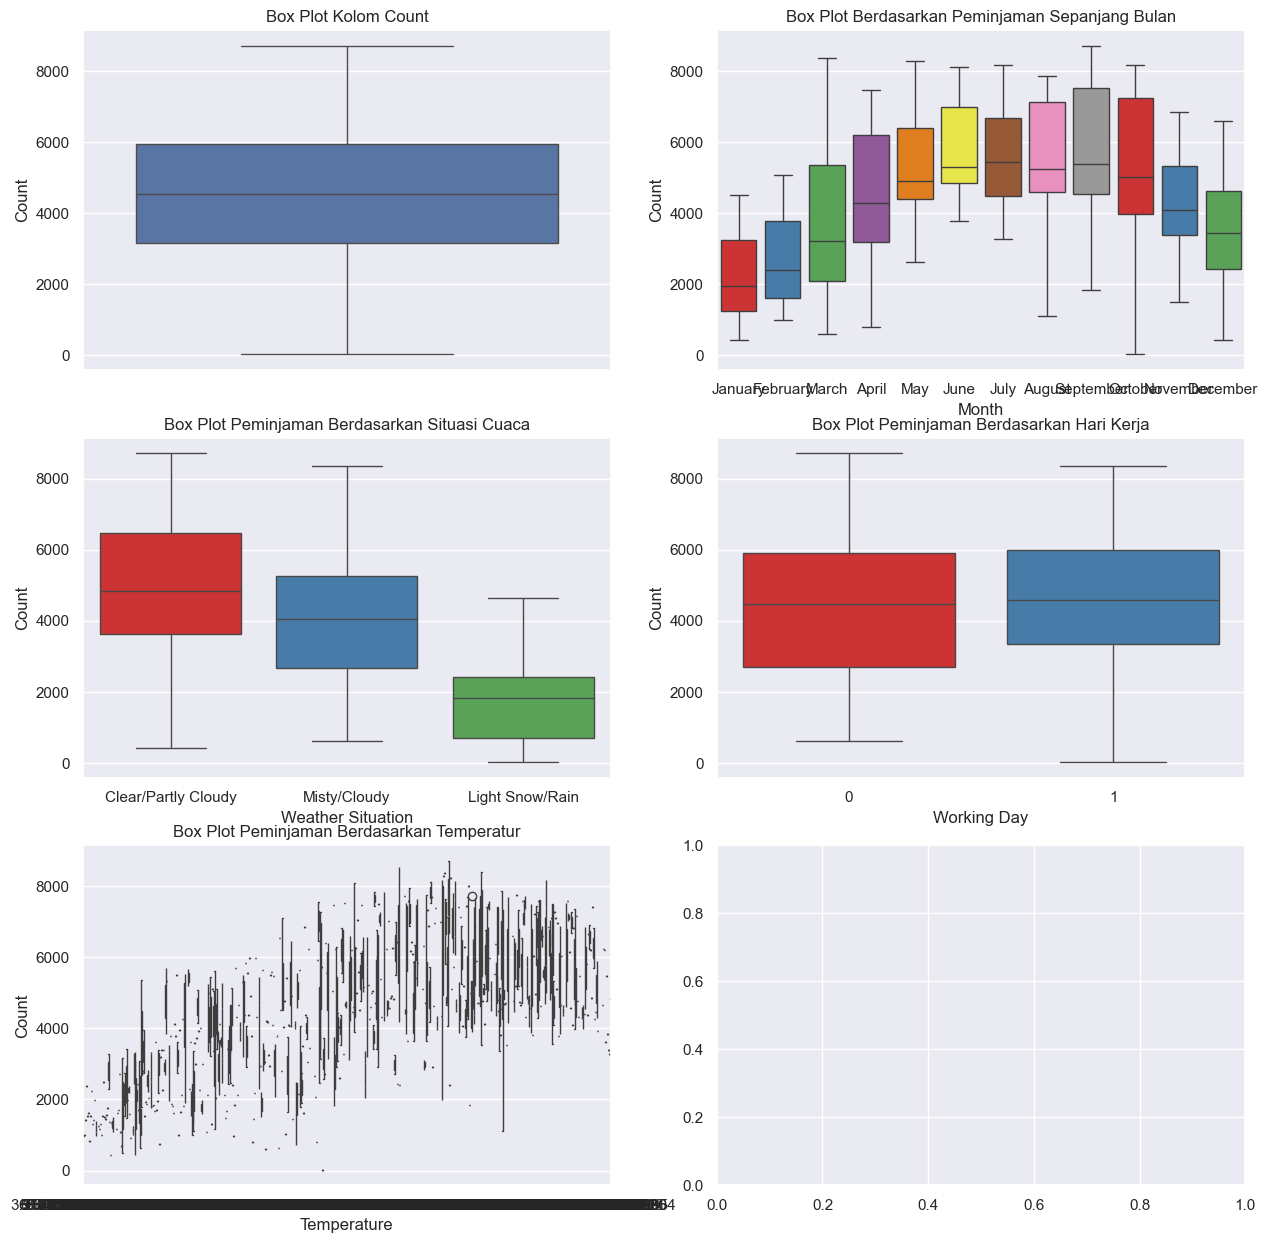

In [42]:
sn.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sn.boxplot(data=daily_data, y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=daily_data, y="count", x="month", orient="v", ax=axes[0][1], hue="month", palette='Set1', legend=False)
sn.boxplot(data=daily_data, y="count", x="weather", orient="v", ax=axes[1][0], hue="weather", palette='Set1', legend=False)
sn.boxplot(data=daily_data, y="count", x="workingday", orient="v", ax=axes[1][1], hue="workingday", palette='Set1', legend=False)
sn.boxplot(data=daily_data, y="count", x="temp", orient="v", ax=axes[2][0], hue="temp", palette='Set1', legend=False)

axes[0][0].set(ylabel='Count',title="Box Plot Kolom Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot Berdasarkan Peminjaman Sepanjang Bulan")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot Peminjaman Berdasarkan Situasi Cuaca")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot Peminjaman Berdasarkan Hari Kerja")
axes[2][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot Peminjaman Berdasarkan Temperatur")

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\2132118714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(hourly_data['count'])


<Axes: xlabel='count', ylabel='Density'>

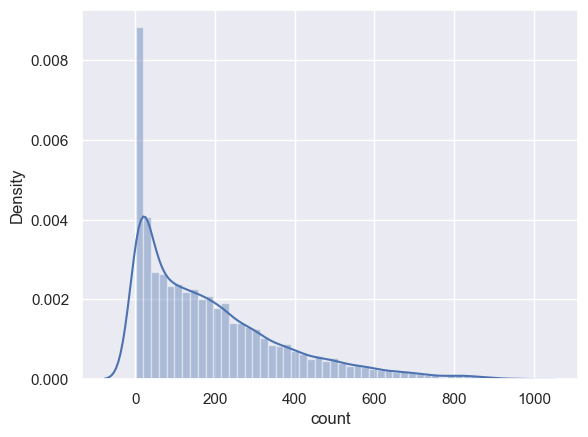

In [43]:
sn.distplot(hourly_data['count'])

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot Peminjaman Setiap Jam')]

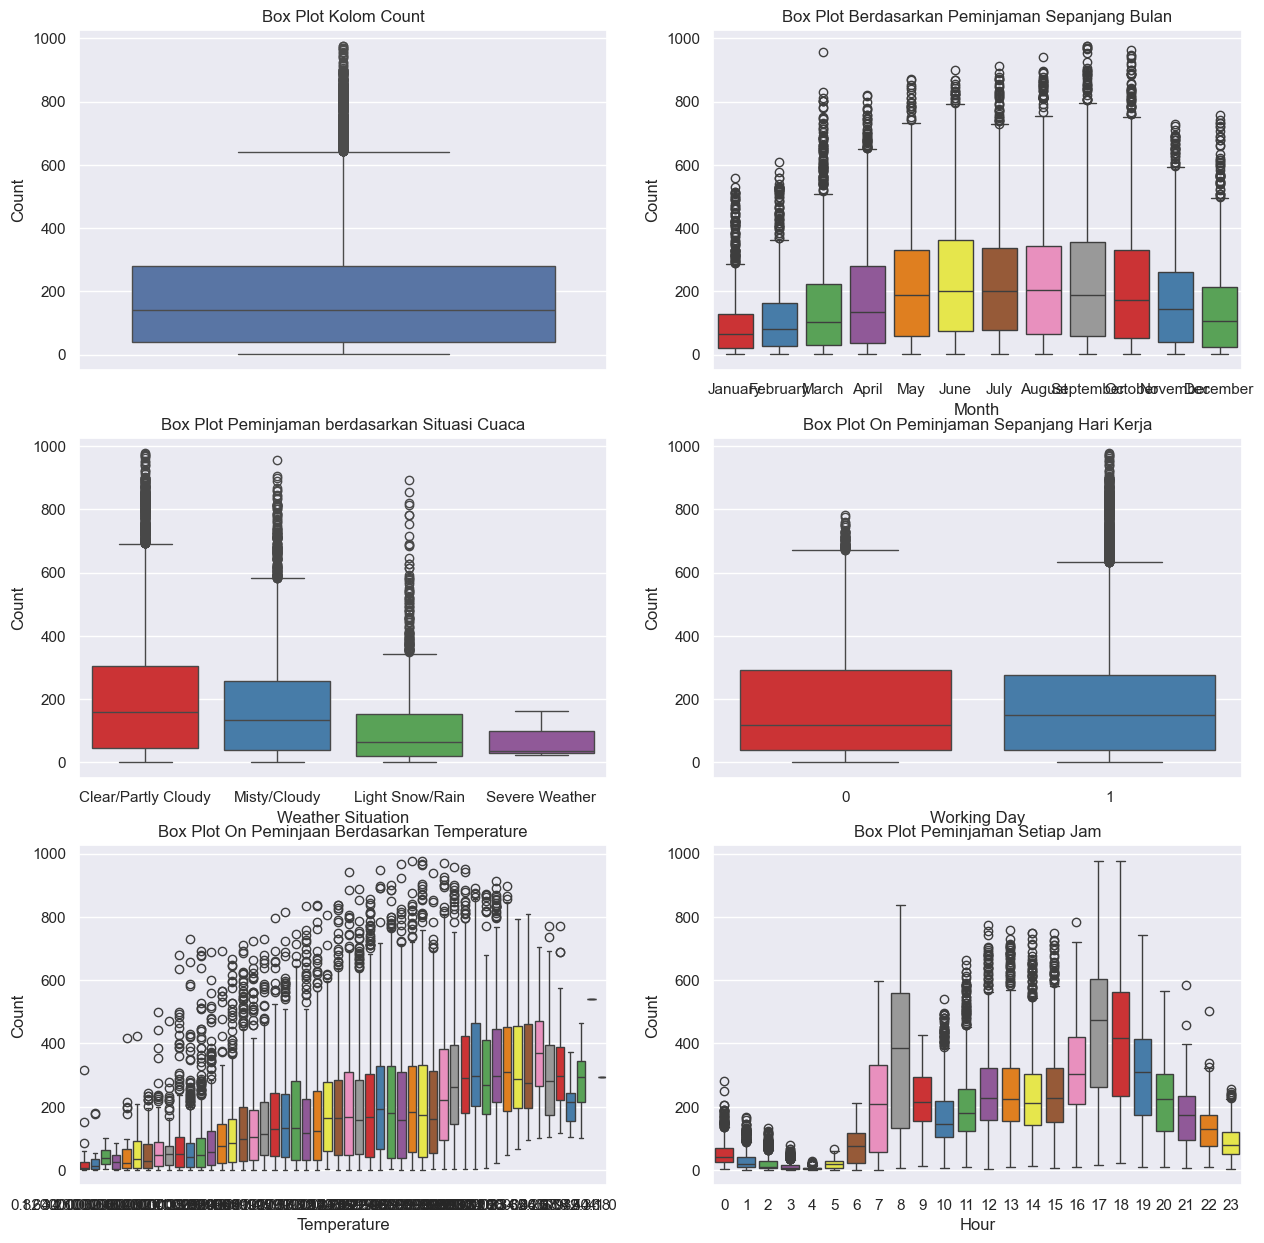

In [44]:
sn.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sn.boxplot(data=hourly_data, y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=hourly_data, y="count", x="month", orient="v", ax=axes[0][1], hue="month", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="weather", orient="v", ax=axes[1][0], hue="weather", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="workingday", orient="v", ax=axes[1][1], hue="workingday", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="temp", orient="v", ax=axes[2][0], hue="temp", palette='Set1', legend=False)
sn.boxplot(data=hourly_data, y="count", x="hour", orient="v", ax=axes[2][1], hue="hour", palette='Set1', legend=False)

axes[0][0].set(ylabel='Count',title="Box Plot Kolom Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot Berdasarkan Peminjaman Sepanjang Bulan")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot Peminjaman berdasarkan Situasi Cuaca")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Peminjaman Sepanjang Hari Kerja")
axes[2][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Peminjaan Berdasarkan Temperature")
axes[2][1].set(xlabel='Hour', ylabel='Count',title="Box Plot Peminjaman Setiap Jam")

Dilihat dari visualisasi tersebut dapat dilihat bahwa outlier ada pada file hour.csv namun tidak terlihat adanya outlier pada file day.csv. Pada tahap EDA file day.csv akan digunakan untuk melihat trend peminjaman sepeda, pengaruh musim pada peminjaman sepeda, dan perbandingan peminjam sepeda registered dan casual, sedangakan untuk hour.csv akan digunakan untuk melihat tingkat peminjaman dalam sehari jam berapakah adanya lonjakan peminjam sepeda.

## Exploratory Data Analysis (EDA)

### Explore ...

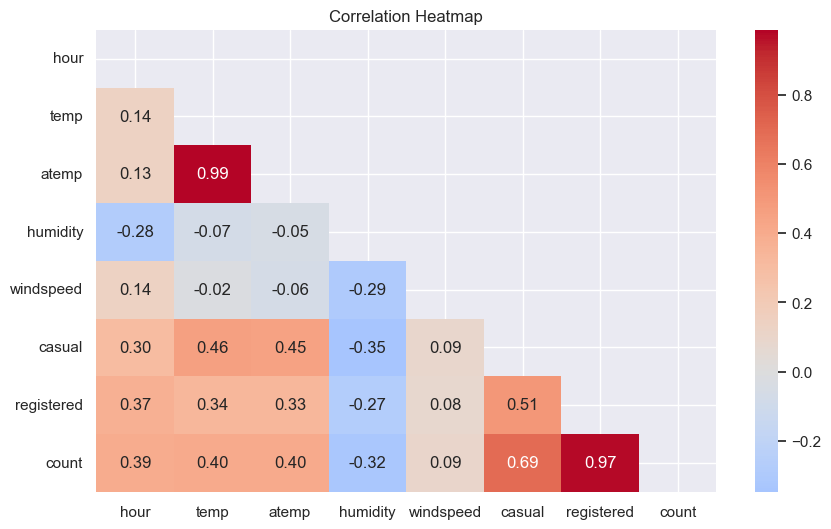

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

correlation_matrix = hourly_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sn.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()

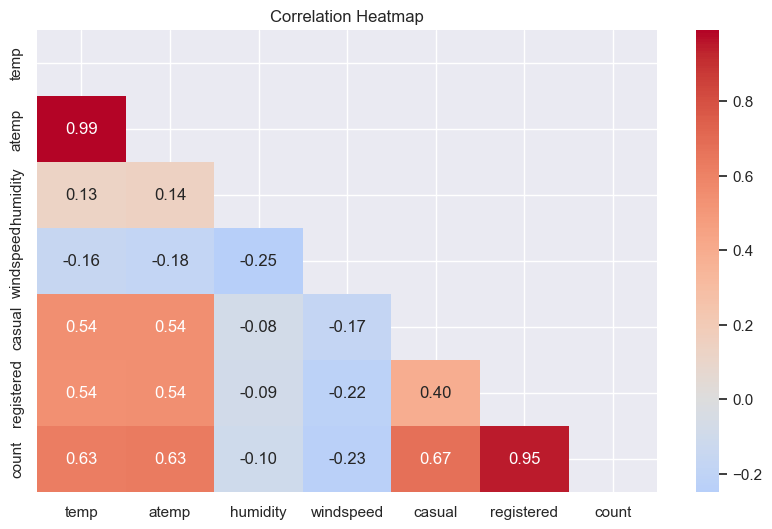

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

correlation_matrix = daily_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sn.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()

Trend Peminjaman Sepeda:

In [47]:
daily_data.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\3464882040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='year').agg({


count                           
       max  min         mean      sum
year                                 
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

In [48]:
daily_data.groupby('year')[['registered', 'casual','count']].sum()

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\3665887676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby('year')[['registered', 'casual','count']].sum()


,registered,casual,count
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


In [49]:
daily_data.groupby(by=["year","month"]).agg({
    "count": "sum"
}).reset_index()

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\3392944384.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by=["year","month"]).agg({


,year,month,count
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821
5,2011,June,143512
6,2011,July,141341
7,2011,August,136691
8,2011,September,127418
9,2011,October,123511


C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\2055234824.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = daily_data.groupby(by=["year", "month"]).agg({"count": "sum"}).reset_index()


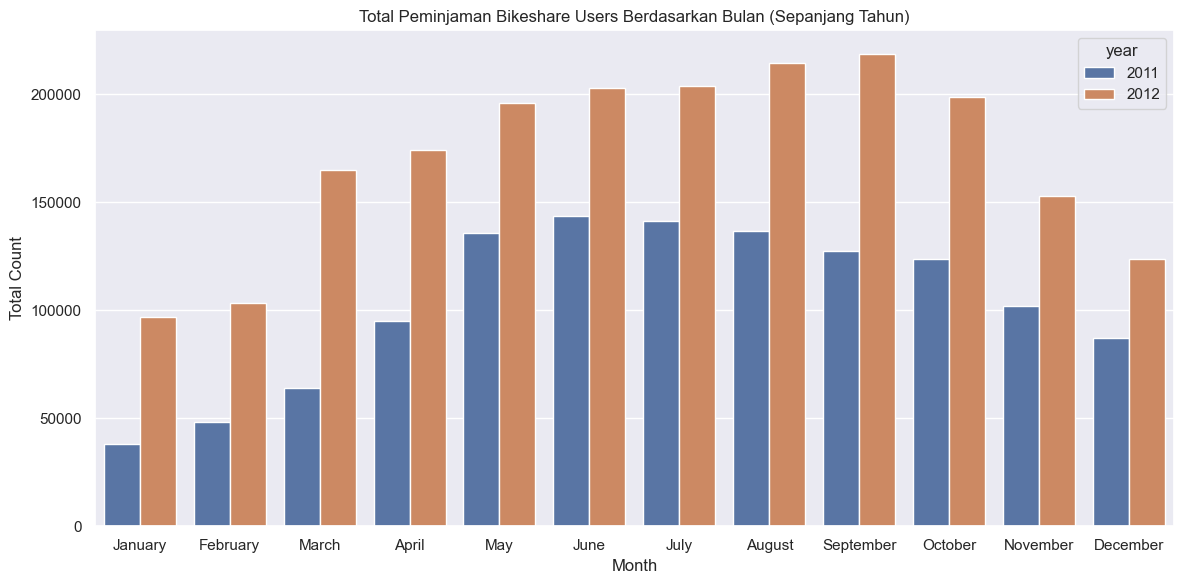

In [50]:
monthly_counts = daily_data.groupby(by=["year", "month"]).agg({"count": "sum"}).reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sn.barplot(x="month", y="count", hue="year", data=monthly_counts)

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.title("Total Peminjaman Bikeshare Users Berdasarkan Bulan (Sepanjang Tahun)")

# Show the plot
plt.tight_layout()
plt.show()

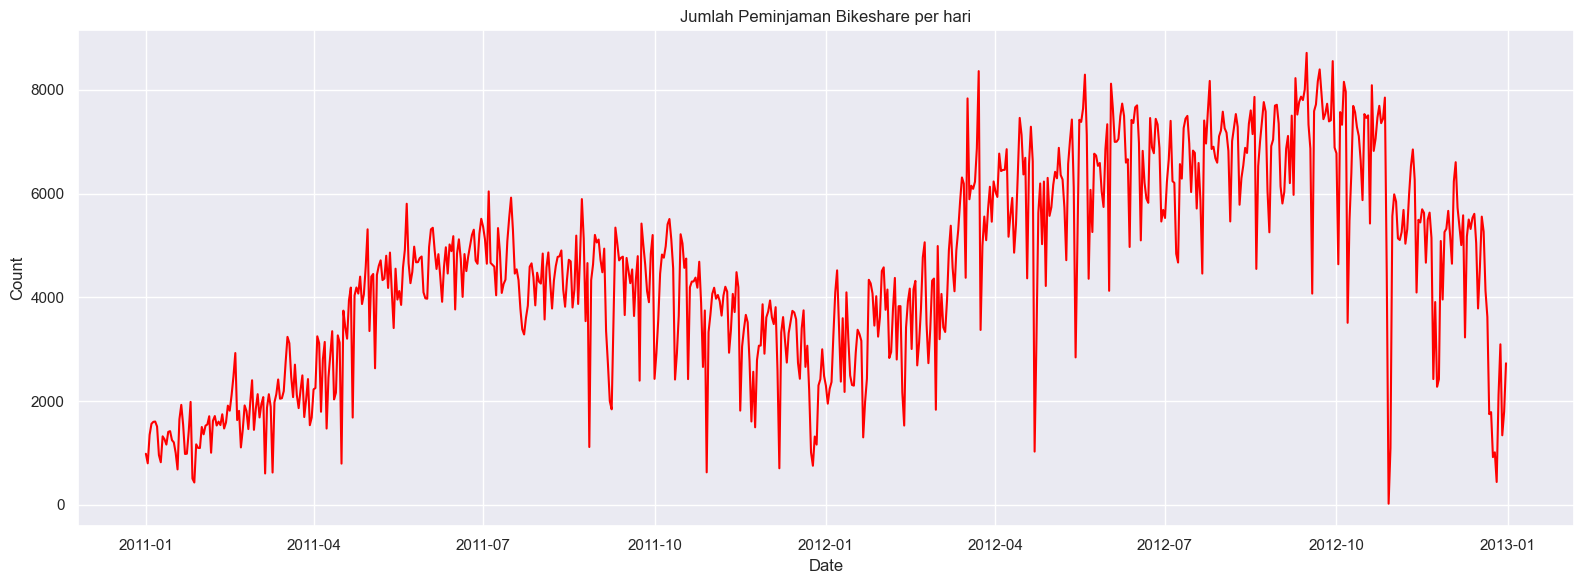

In [51]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sn.lineplot(x="date", y="count", data=daily_data, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Jumlah Peminjaman Bikeshare per hari")

# Show the plot
plt.tight_layout()
plt.show()

Peminjaman sepeda berdasarkan cuaca:

In [52]:
daily_data.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\3536143259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='weather').agg({


count                           
                      max  min         mean      sum
weather                                             
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

Peminjaman sepeda perhari:

In [53]:
daily_data.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\2296017708.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

Peminjaman sepeda perjam:

In [54]:
hourly_data.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

Peminjaman sepeda di hari kerja dan liburan:

In [55]:
daily_data.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\1083731294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [56]:
daily_data.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\666737473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Peminjaman sepeda tiap musim:

In [57]:
daily_data.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\3808122768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

Kondisi faktor lain tiap musim:

In [58]:
daily_data.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\1677125737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_data.groupby(by='season').agg({


temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
Spring  23.472500   2.424346  12.207650  27.43085   3.95348  14.845697   
Summer  33.141653  10.374763  22.320611  37.87895  12.51695  26.015366   
Fall    35.328347  19.235847  28.958682  42.04480  12.12000  32.794920   
Winter  26.957500   9.054153  17.339148  30.39875  11.39565  20.776937   

       humidity                      
            max      min       mean  
season                               
Spring  94.8261   0.0000  58.290291  
Summer  92.2500  25.4167  62.694833  
Fall    93.9565  36.0000  63.348206  
Winter  97.2500  33.3478  66.871917

### Univariate Analysis

In [59]:
float_vars = ['temp', 'atemp', 'humidity', 'windspeed']
df_float = daily_data[float_vars]

df_float.describe()

,temp,atemp,humidity,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


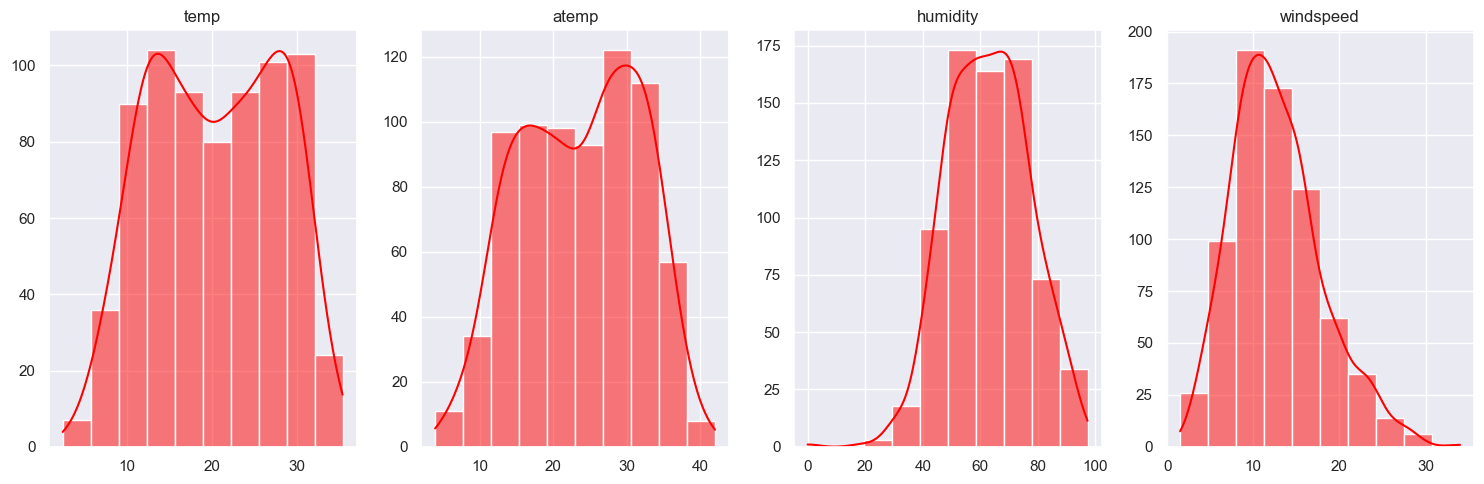

In [60]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))
for i, ax in enumerate(axs):
    sn.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='red')
    
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

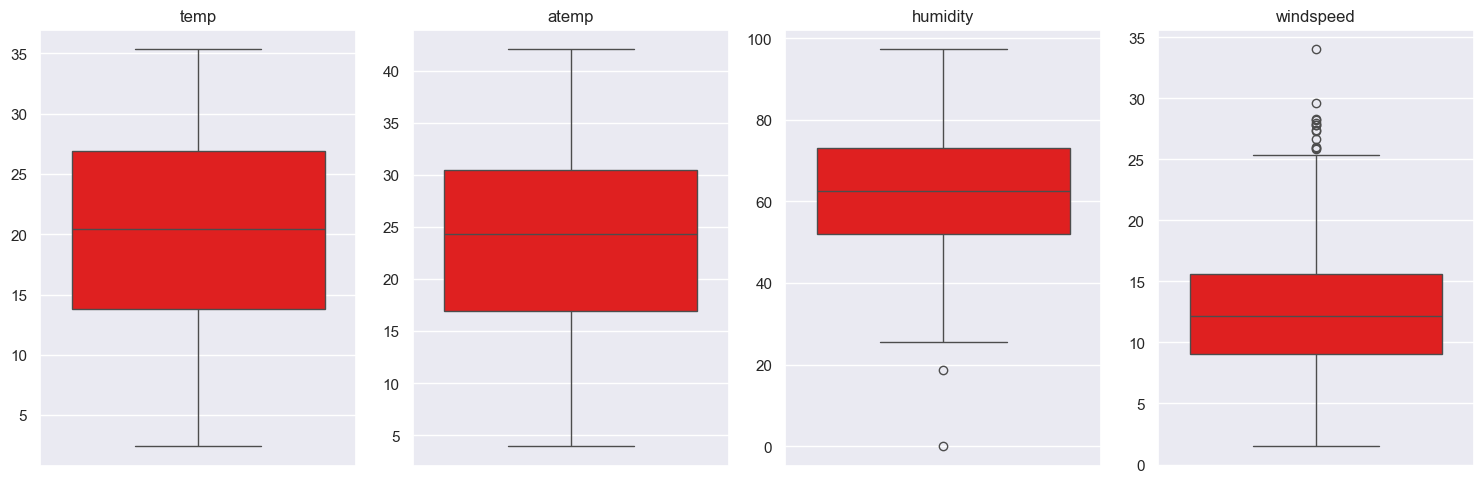

In [61]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axs):
    sn.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='red')

    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

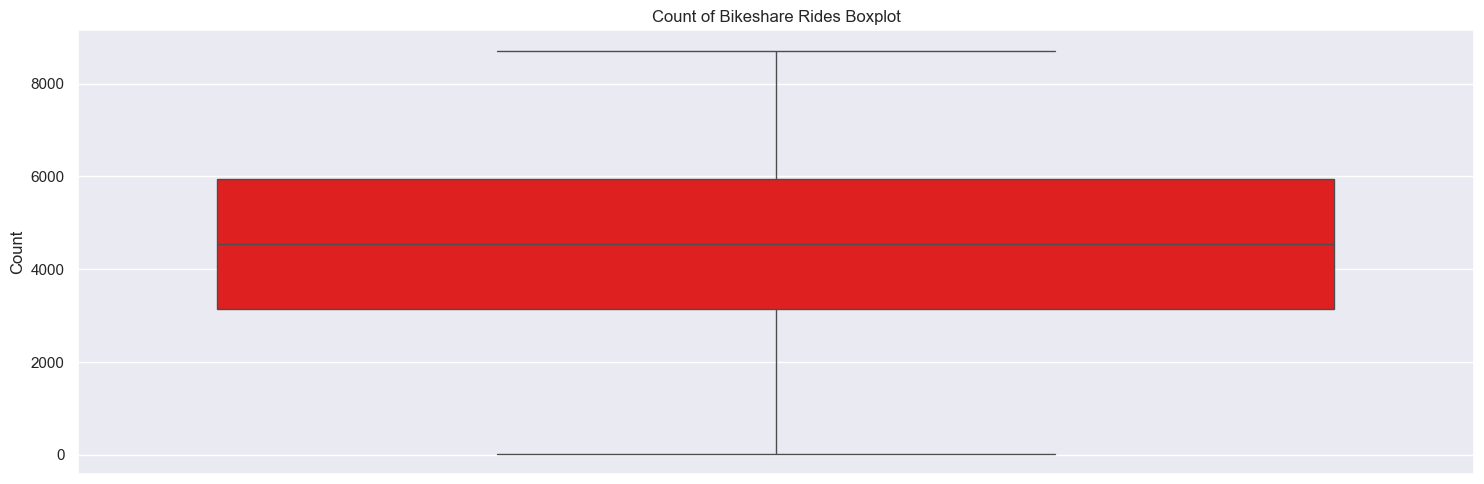

In [62]:
fig, axs = plt.subplots(figsize=(15, 5))

sn.boxplot(y=daily_data['count'], ax=axs, color='red')

plt.xlabel("")
plt.ylabel("Count")
plt.title("Count of Bikeshare Rides Boxplot")

plt.tight_layout()
plt.show()

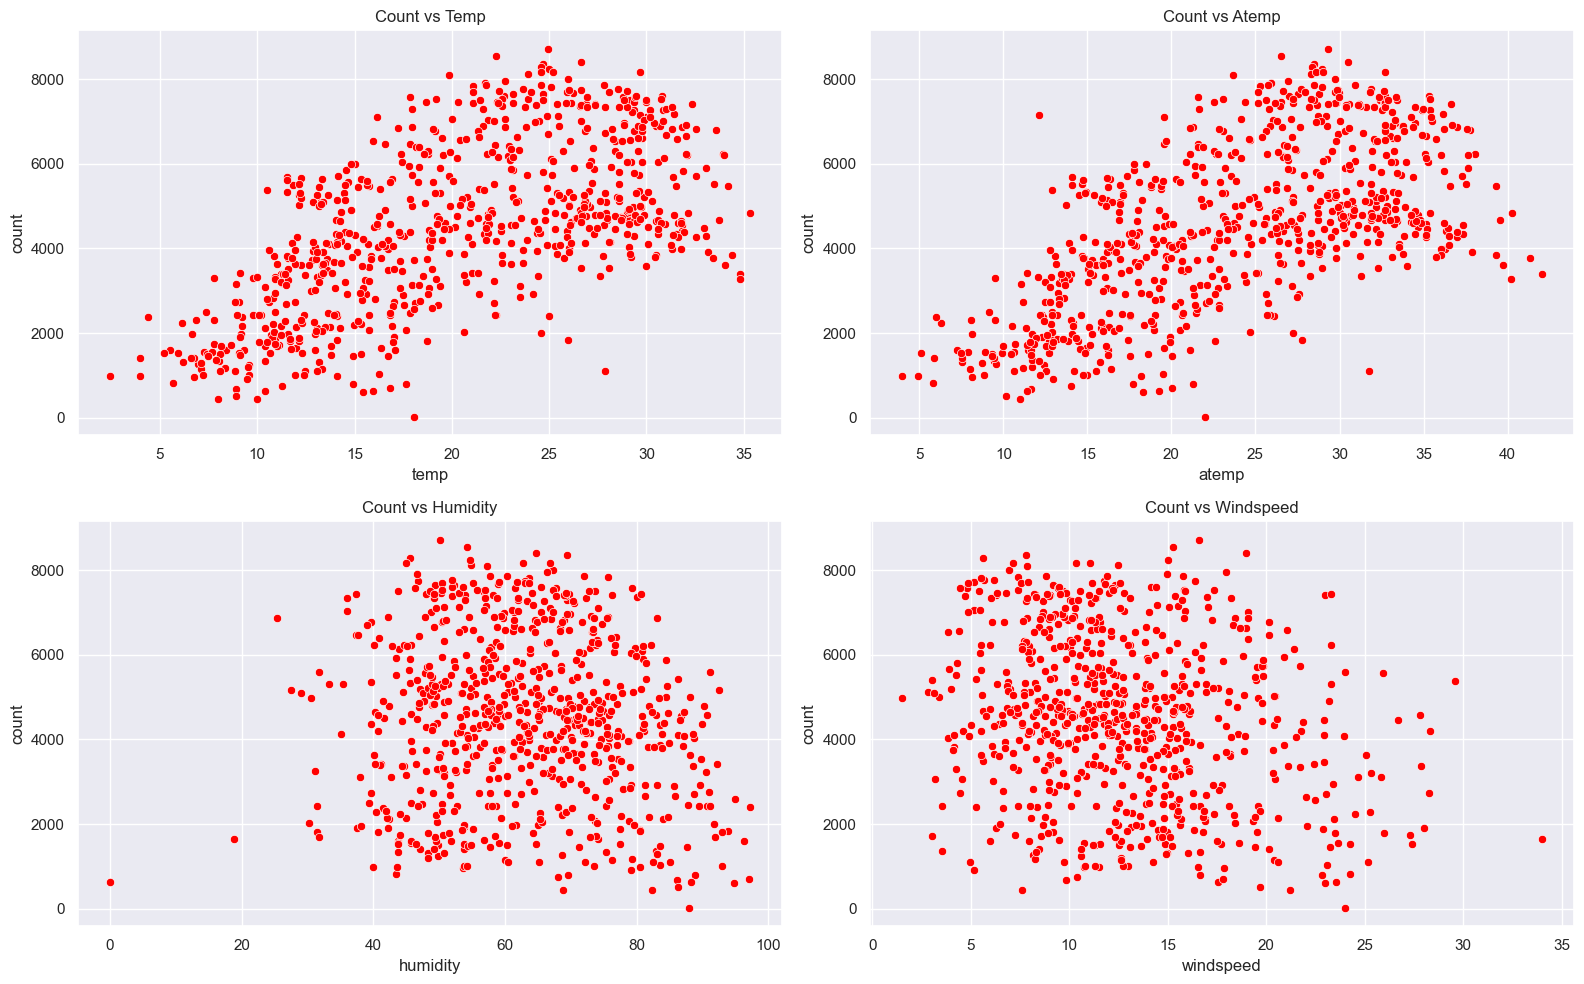

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

columns_to_plot = ['temp', 'atemp', 'humidity', 'windspeed']

for i, col in enumerate(columns_to_plot):
    sn.scatterplot(x=col, y='count', data=daily_data, ax=axs[i // 2, i % 2], color='red')
    axs[i // 2, i % 2].set_title(f'Count vs {col.capitalize()}')

plt.tight_layout()

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend peminjaman sepeda dalam 2 tahun kebelakang?


In [64]:
monthly_users_df = daily_data.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

monthly_users_df.head(3)

,casual,registered,count
date,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [65]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [66]:
monthly_users_df.head(3)

,casual,registered,count
date,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045


In [67]:
monthly_users_df = monthly_users_df.reset_index()

In [68]:
monthly_users_df = monthly_users_df.rename(columns={'date': 'yearmonth'})

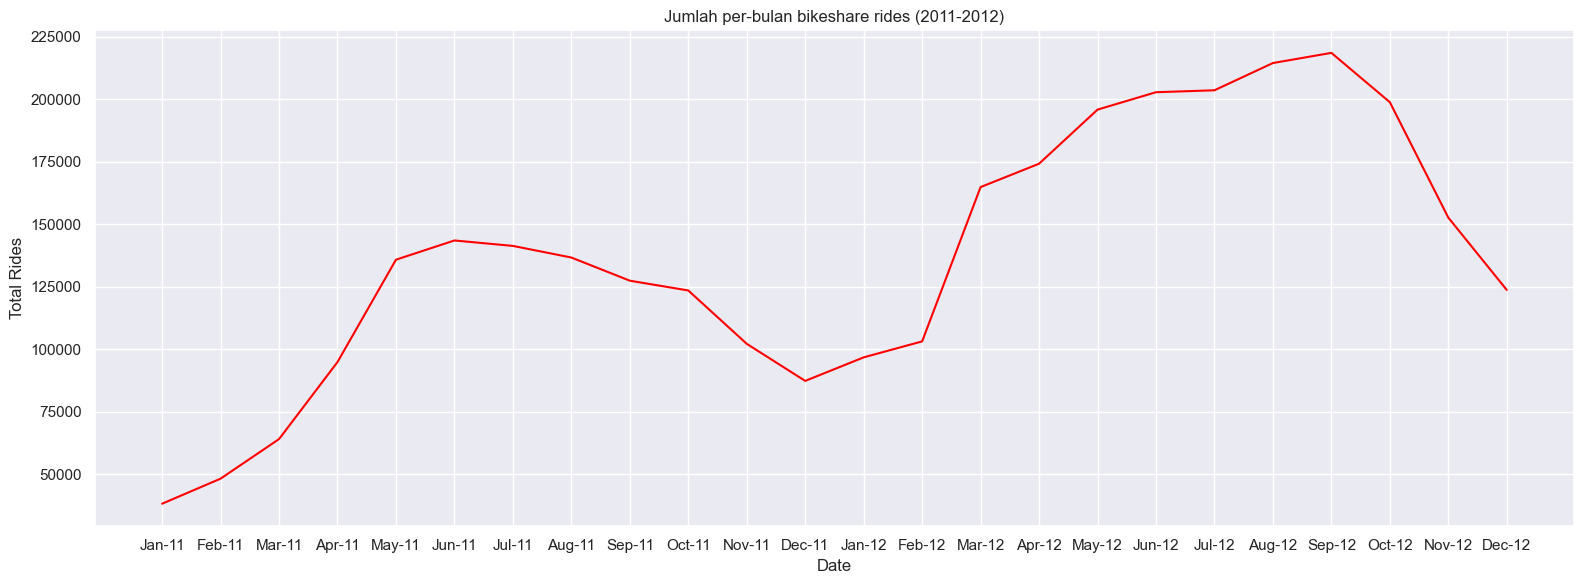

In [69]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sn.lineplot(x="yearmonth", y="count", data=monthly_users_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Jumlah per-bulan bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

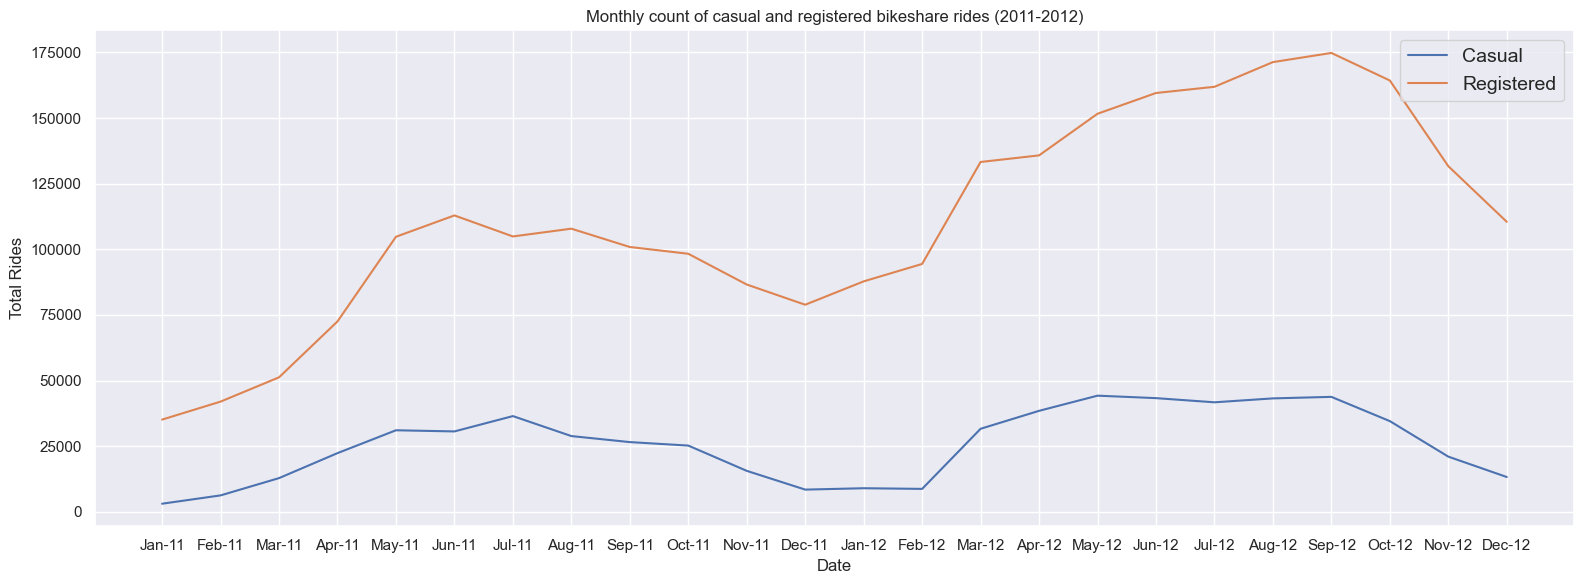

In [70]:
plt.figure(figsize=(16,6))
sn.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sn.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011.
2. Kita bisa melihat adanya pola dalam 2 tahun tersebut. Jumlah perjalanan bikeshare biasanya mulai rendah di awal tahun, lalu mulai meningkat di Q2, lalu mulai menurun di Q4.
3. Jumlah aktivitas bikeshare registered user lebih tinggi dibandingkan aktivitas casual usr, meskipun keduanya menunjukkan tren yang sama sepanjang tahun.

### Pertanyaan 2: Apakah ada jam tertentu dimana peminjaman sepeda naik?


In [71]:
hourly_users_df = hourly_data.groupby("hour").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

hourly_users_df.head()

,casual,registered,count
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [72]:
hourly_users_df = hourly_users_df.reset_index()

In [73]:
hourly_users_df.head()

,hour,casual,registered,count
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


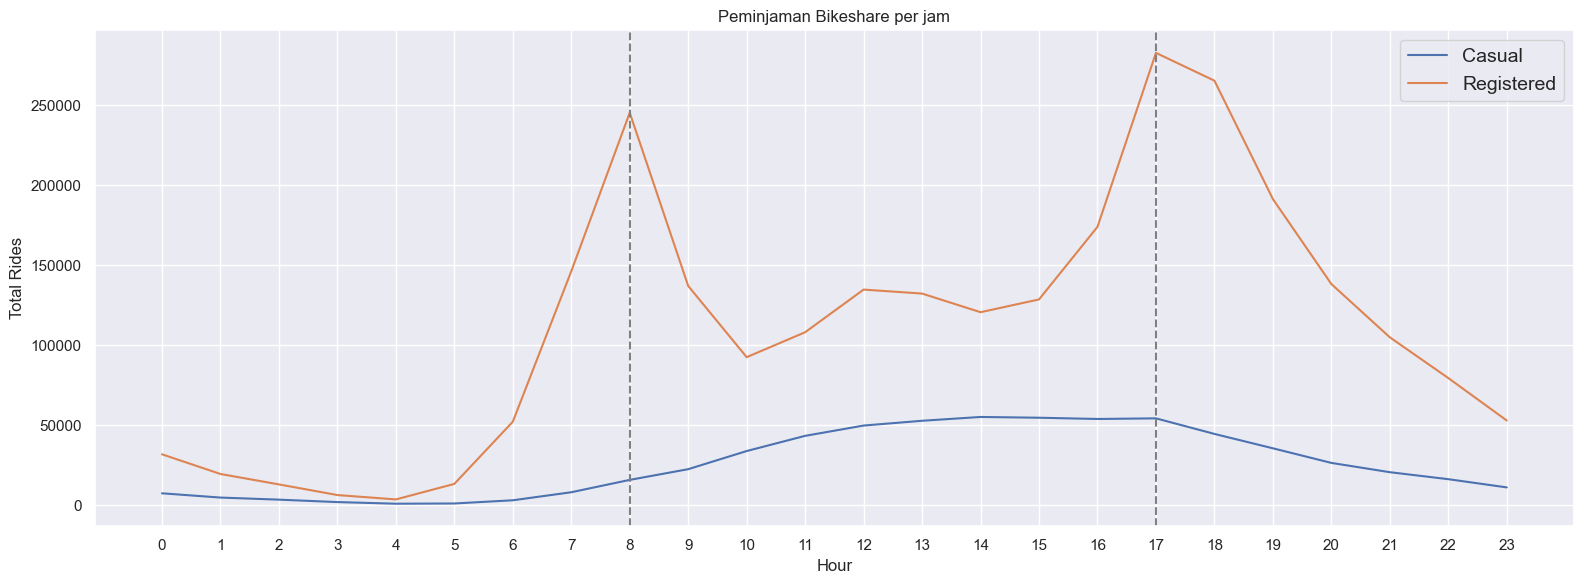

In [74]:
plt.figure(figsize=(16,6))

sn.lineplot(x="hour", y="casual", data=hourly_users_df, label='Casual')
sn.lineplot(x="hour", y="registered", data=hourly_users_df, label='Registered')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Peminjaman Bikeshare per jam")

plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. Bagan di atas menunjukkan pola berbeda yang sangat jelas tentang perbedaan antara perjalanan bikeshare casual dan registered berdasarkan jam dalam sehari.
2. Bikeshare registered user menunjukkan puncaknya pada pukul 8.00 dan 17.00. Mengingat kedua jam tersebut adalah waktu orang berangkat dan pulang kerja, ada kemungkinan registered user menggunakan sepeda tersebut untuk berangkat kerja.
3. Sebaliknya, aktivitas bersepeda casual user menunjukkan frekuensi yang lebih tinggi pada siang hari, kemudian mulai menurun setelah pukul 17.00.

### Pertanyaan 3: Apa musim yang memiliki peminjam sepeda terbanyak?

In [75]:
seasonly_users_df = daily_data.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

seasonly_users_df.head().sort_values('count')

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\1253105370.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonly_users_df = daily_data.groupby("season").agg({


,casual,registered,count
season,,,
Spring,60622,410726,471348
Winter,129782,711831,841613
Summer,203522,715067,918589
Fall,226091,835038,1061129


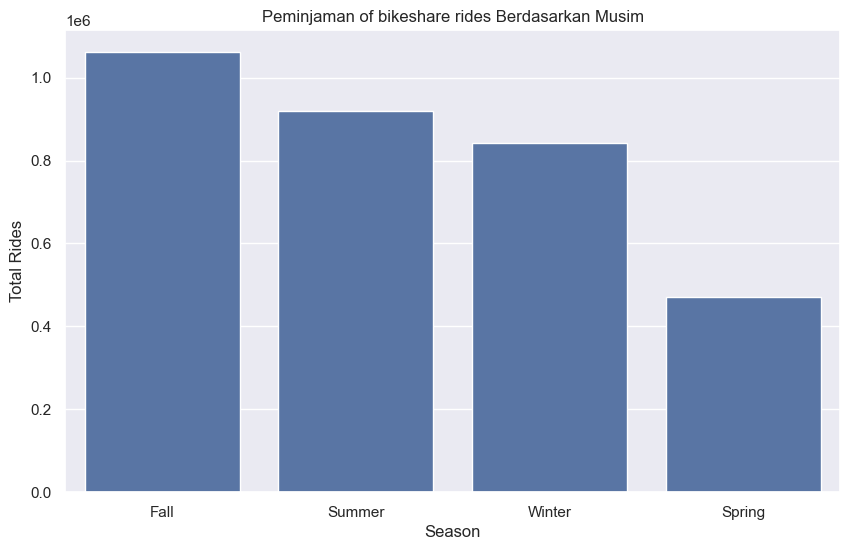

In [76]:
season_order = ['Fall', 'Summer', 'Winter', 'Spring']
plt.figure(figsize=(10,6))

sn.barplot(x="season", y="count", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Peminjaman of bikeshare rides Berdasarkan Musim")

plt.show()

In [77]:
seasonly_users_df_grouped = seasonly_users_df.groupby('season')[['casual', 'registered']].sum().reset_index()

seasonly_users_df_unpivoted = seasonly_users_df_grouped.melt(
    id_vars='season',
    var_name='status',
    value_name='user_count'
)



C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\570231909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonly_users_df_grouped = seasonly_users_df.groupby('season')[['casual', 'registered']].sum().reset_index()


In [78]:
seasonly_users_df_unpivoted

,season,status,user_count
0,Spring,casual,60622
1,Summer,casual,203522
2,Fall,casual,226091
3,Winter,casual,129782
4,Spring,registered,410726
5,Summer,registered,715067
6,Fall,registered,835038
7,Winter,registered,711831


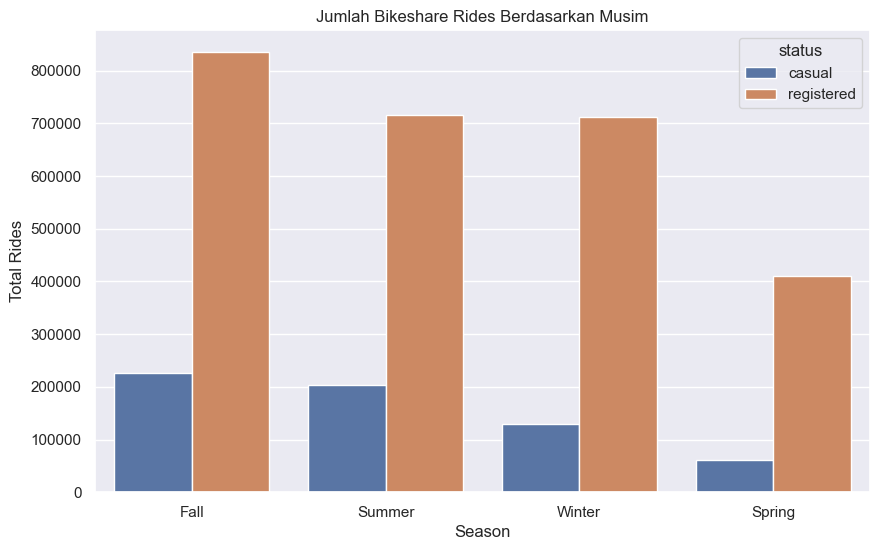

In [79]:
plt.figure(figsize=(10,6))

sn.barplot(x='season', y='user_count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Jumlah Bikeshare Rides Berdasarkan Musim")

plt.show()

**Insight**
- The count of bikeshare rides are highest during Fall season, and lowest during Spring season.
- There are no major difference between casual and registered rides pattern during season, both are highest in Fall and lowest during Spring.

### Pertanyaan 4: Apakah ada korelasi antara suhu dan kelembaban dengan jumlah peminjaman sepeda?

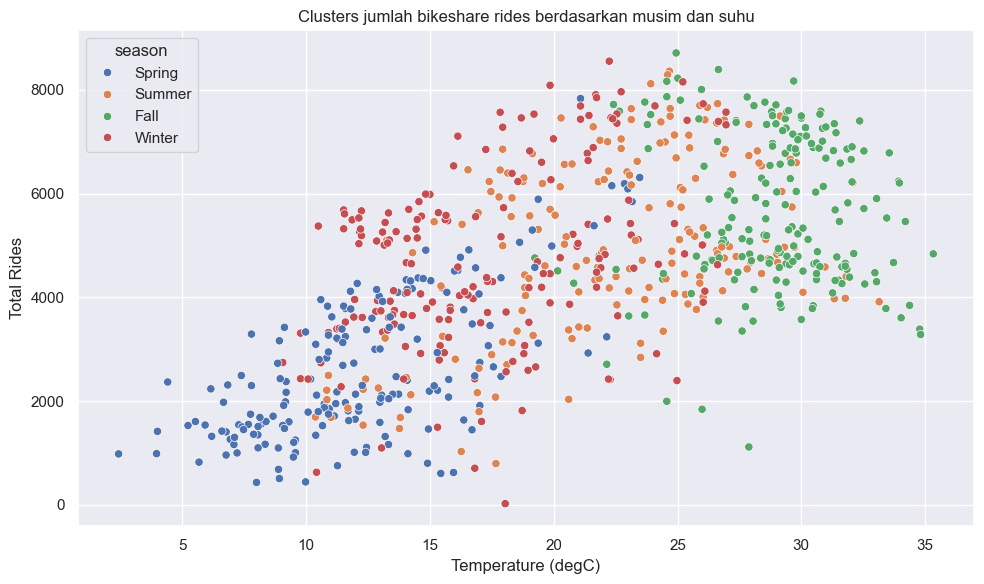

In [80]:
plt.figure(figsize=(10,6))

sn.scatterplot(x='temp', y='count', data=daily_data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters jumlah bikeshare rides berdasarkan musim dan suhu")

plt.tight_layout()
plt.show()

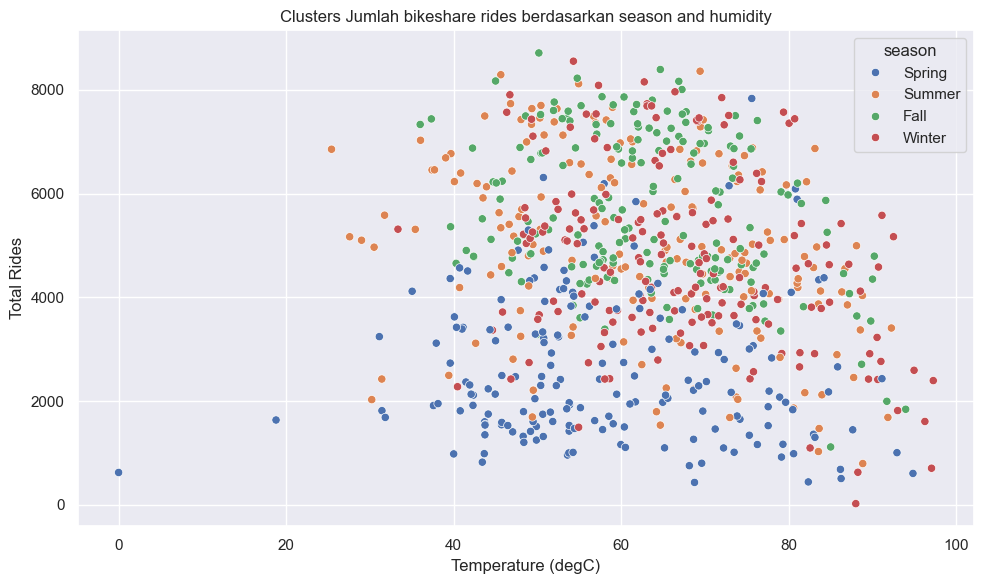

In [81]:
plt.figure(figsize=(10,6))

sn.scatterplot(x='humidity', y='count', data=daily_data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters Jumlah bikeshare rides berdasarkan season and humidity")

plt.tight_layout()
plt.show()

### Pertanyaan 5: Apakah cuaca mempengaruhi peminjaman sepeda?

C:\Users\andhika\AppData\Local\Temp\ipykernel_22588\3166850847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weatherly_users_df = daily_data.groupby("weather").agg({


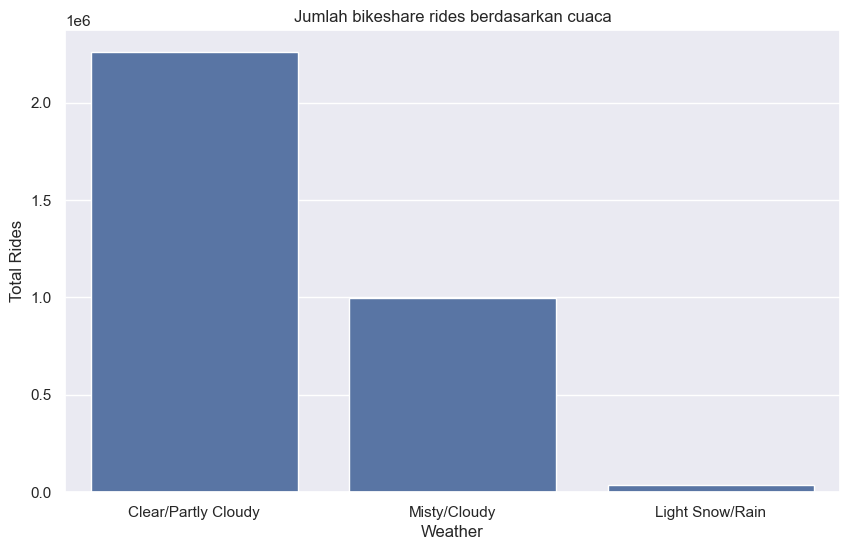

In [82]:
weatherly_users_df = daily_data.groupby("weather").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})
plt.figure(figsize=(10,6))

sn.barplot(x="weather", y="count", data=weatherly_users_df)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Jumlah bikeshare rides berdasarkan cuaca")

plt.show()

## Conclusion

Conclution pertanyaan 1

- Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat pada pertengahan tahun dan menurun pada awal dan akhir tahun.

Conclution pertanyaan 2

- Pada registered users, jumlah perjalanan mencapai puncaknya pada pukul 08.00 dan 17.00, yang menunjukkan bahwa mereka mungkin menggunakan sepeda untuk berangkat kerja. 
- Sedangkan casual users, jumlah perjalanan mulai meningkat pada siang hari dan menurun pada malam hari.

Conclution pertanyaan 3

- Jumlah perjalanan bikeshare tertinggi terjadi pada musim panas dan terendah pada musim dingin.

Conclution pertanyaan 4

- Terdapat korelasi antara suhu dan jumlah perjalanan bikeshare dimana seiring peningkatan suhu peminjam sepeda meningkat.
- Jumlah peminjaman paling sedikit terjadi pada suhu yang lebih dingin, yang terjadi selama musim dingin, dan mulai meningkat seiring dengan peningkatan suhu, yang terjadi pada musim panas. Namun, ada "sweet spot" atau kisaran suhu saat jumlah peminjam paling banyak, yaitu antara 20°C dan 30°C. Kisaran suhu ini biasanya terjadi pada musim panas dan musim gugur.
- Sedangkan untuk kelembaban/humidity terlihat bahwa peminjam paling banyak di antara 40-80 dan seiring peningkatan kelembaban peminjam sepeda semakin berkurang

Conclution pertanyaan 5

- Ya, jumlah peminjaman jauh lebih tinggi saat cuaca cerah dibandingkan saat kondisi cuaca lebih ekstrem.